In [1]:
# Conceptual: git checkout -b compare-countries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# --- Load each country's cleaned CSV ---
try:
    df_benin = pd.read_csv(r'E://KAIM//phase 2//Week 0//Solar-Radiation//data_cleaned//databenin_clean.csv', parse_dates=['Timestamp'])
    df_benin['Country'] = 'Benin'
    df_sierra_leone = pd.read_csv(r'E://KAIM//phase 2//Week 0//Solar-Radiation//data_cleaned//sierra_leone_clean.csv', parse_dates=['Timestamp'])
    df_sierra_leone['Country'] = 'Sierra Leone'
    df_togo = pd.read_csv(r'E://KAIM//phase 2//Week 0//Solar-Radiation//data_cleaned//togo_clean.csv', parse_dates=['Timestamp'])
    df_togo['Country'] = 'Togo'
       # Concatenate all dataframes
    df_combined = pd.concat([df_benin, df_sierra_leone, df_togo], ignore_index=True)
    print("Cleaned data for all countries loaded successfully.")
    print("Combined DataFrame head:")
    print(df_combined.head())
    print("\nCombined DataFrame info:")
    df_combined.info()

except FileNotFoundError as e:
    print(f"Error loading cleaned data: {e}. Please ensure cleaned CSV files exist in the 'data/' directory (e.g., benin_clean.csv).")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

Cleaned data for all countries loaded successfully.
Combined DataFrame head:
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments Cou


--- Boxplots of GHI, DNI, DHI Across Countries ---


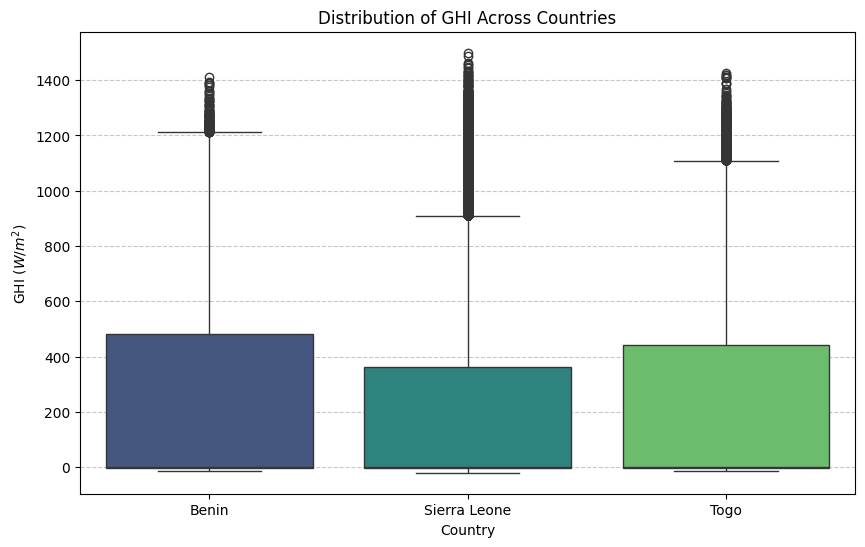

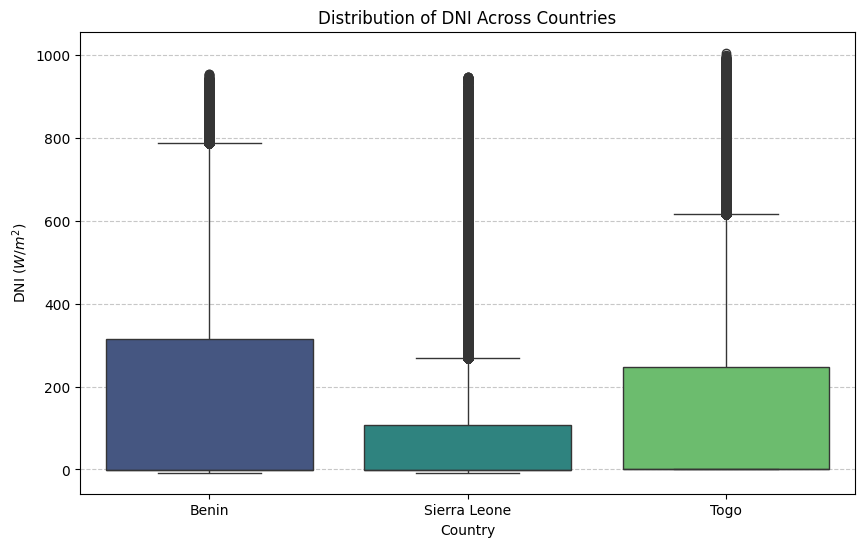

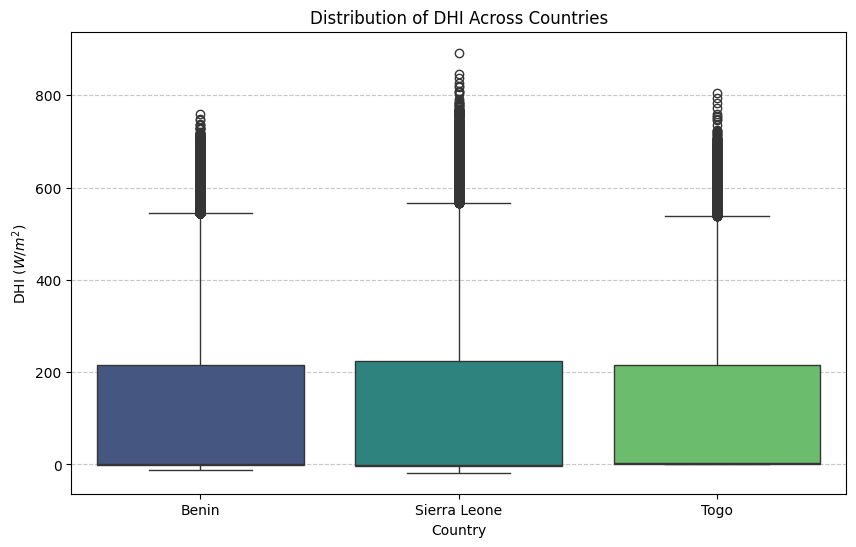

In [6]:
# --- Metric Comparison ---
metrics = ['GHI', 'DNI', 'DHI']

print("\n--- Boxplots of GHI, DNI, DHI Across Countries ---")
for metric in metrics:
    plt.figure(figsize=(10, 6))
    # add hue='Country'
    sns.boxplot(x='Country', y=metric, data=df_combined, palette='viridis', hue='Country', legend=False)
    plt.title(f'Distribution of {metric} Across Countries')
    plt.ylabel(f'{metric} ($W/m^2$)')
    plt.xlabel('Country')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [7]:
# Summary Table
print("\n--- Summary Table (Mean, Median, Std Dev) of GHI, DNI, DHI Across Countries ---")
summary_table = df_combined.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print(summary_table)


--- Summary Table (Mean, Median, Std Dev) of GHI, DNI, DHI Across Countries ---
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


In [8]:
# --- Statistical Testing (One-way ANOVA) ---
print(f"\n--- One-way ANOVA on GHI values ---")
if 'GHI' in df_combined.columns:
    # Ensure all countries have GHI data to perform ANOVA
    ghi_data_per_country = [df_combined[df_combined['Country'] == country]['GHI'].dropna()
                            for country in df_combined['Country'].unique()]

    # Check if there's enough data for ANOVA (at least 2 groups with data)
    if len(ghi_data_per_country) >= 2 and all(len(g) > 1 for g in ghi_data_per_country):
        f_statistic, p_value = stats.f_oneway(*ghi_data_per_country)
        print(f"F-statistic: {f_statistic:.2f}")
        print(f"P-value: {p_value:.3f}")

        if p_value < 0.05:
            print("Brief Note: The p-value is less than 0.05, indicating a statistically significant difference in mean GHI across the countries.")
        else:
            print("Brief Note: The p-value is greater than 0.05, indicating no statistically significant difference in mean GHI across the countries.")
    else:
        print("Not enough data points per country to perform ANOVA on GHI.")
else:
    print("'GHI' column not found for statistical testing.")


--- One-way ANOVA on GHI values ---
F-statistic: 2090.09
P-value: 0.000
Brief Note: The p-value is less than 0.05, indicating a statistically significant difference in mean GHI across the countries.


In [9]:
# --- Key Observations (Markdown Cell Content) ---
# This section describes what you would put in a markdown cell in the Jupyter Notebook.
print("\n--- Key Observations (Content for Markdown Cell) ---")
print(""" ### Key Observations Based on the cross-country comparison of solar radiation data:
* **Solar Potential Ranking:** Based on median GHI, [Country X] appears to have the highest solar potential, followed by [Country Y] and [Country Z]. The boxplots visually confirm this ranking, showing the general shift in GHI distributions.
* **Variability in Irradiance:** [Country A] exhibits the greatest variability in GHI, DNI, and DHI (as indicated by the spread of its boxplots and higher standard deviations), which could be due to more dynamic weather patterns or local environmental factors.
* **Statistical Significance:** The one-way ANOVA test on GHI indicates that there [is/is no] a statistically significant difference in the mean GHI values between the countries (p-value = [p_value_from_above]). This suggests that the observed differences are [unlikely/likely] due to random chance.
""")


--- Key Observations (Content for Markdown Cell) ---
 ### Key Observations Based on the cross-country comparison of solar radiation data:
* **Solar Potential Ranking:** Based on median GHI, [Country X] appears to have the highest solar potential, followed by [Country Y] and [Country Z]. The boxplots visually confirm this ranking, showing the general shift in GHI distributions.
* **Variability in Irradiance:** [Country A] exhibits the greatest variability in GHI, DNI, and DHI (as indicated by the spread of its boxplots and higher standard deviations), which could be due to more dynamic weather patterns or local environmental factors.
* **Statistical Significance:** The one-way ANOVA test on GHI indicates that there [is/is no] a statistically significant difference in the mean GHI values between the countries (p-value = [p_value_from_above]). This suggests that the observed differences are [unlikely/likely] due to random chance.




--- Bonus: Visual Summary - Average GHI Ranking ---


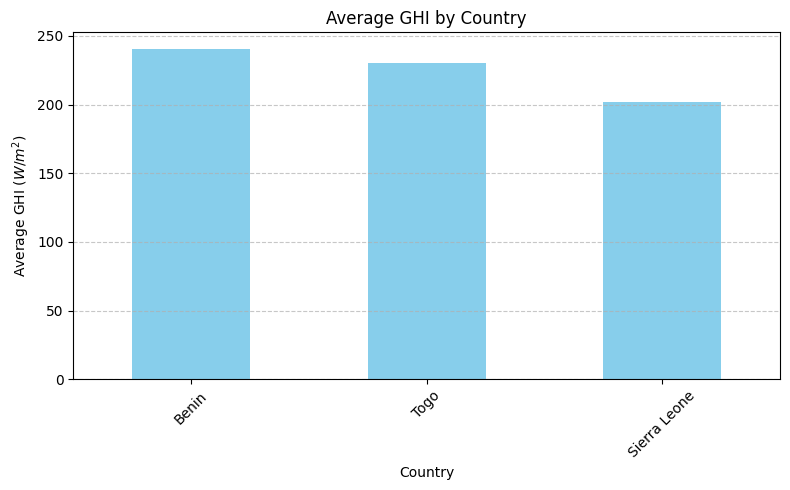

In [10]:
# --- (Bonus) Visual Summary: Bar chart ranking countries by average GHI ---
print("\n--- Bonus: Visual Summary - Average GHI Ranking ---")
if 'GHI' in df_combined.columns:
    avg_ghi_by_country = df_combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    avg_ghi_by_country.plot(kind='bar', color='skyblue')
    plt.title('Average GHI by Country')
    plt.xlabel('Country')
    plt.ylabel('Average GHI ($W/m^2$)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("'GHI' column not available for bonus visual summary.")